In [1]:
import transport
import data
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:
cdf = data.compas()
#Make Numpy
cdf_features = cdf.drop(["two_year_recid","y_pred", "custody_length", "c_jail_time", "is_recid", "decile_score"], axis=1)
X_a = cdf_features.to_numpy()
#Remove protected attributes 
X = preprocessing.scale(X_a[:,:-6])
Y_hat = cdf["y_pred"]
Y_truth = cdf["two_year_recid"]

In [3]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, Y_hat)
clf.score(X, Y_hat)

0.7517822423849644

In [4]:
biased_outcomes = clf.predict_proba(X)
truth_outcomes = np.vstack([Y_truth, np.logical_not(Y_truth)]).T

In [5]:
T = transport.compute_map(truth_outcomes, biased_outcomes)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/ot/lp/__init__.py:276: UserWarning: numItermax reached before optimality. Try to increase numItermax.


In [6]:
from graph import Map

In [7]:
f_columns = cdf_features.columns
column_ix = np.arange(len(f_columns))
f = {f_columns[i]: column_ix[i] for i in range(len(f_columns))}
f
from sklearn.preprocessing import normalize

In [8]:
clf.coef_

array([[ 0.0940211 , -1.06115036,  0.27858832,  0.19991214,  0.12913338,
         1.39624567,  0.18997963,  0.19022102]])

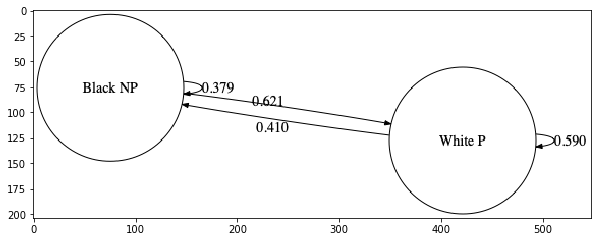

In [9]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["priors_count"]] == 0 and x[f["African-American"]] == 1, "Black NP")
g.add_group(lambda x: x[f["priors_count"]] > 0 and x[f["Caucasian"]] == 1, "White P")
adj = normalize(g.group_adj, axis=1, norm="l1")
g.show_graph(grouped=True)

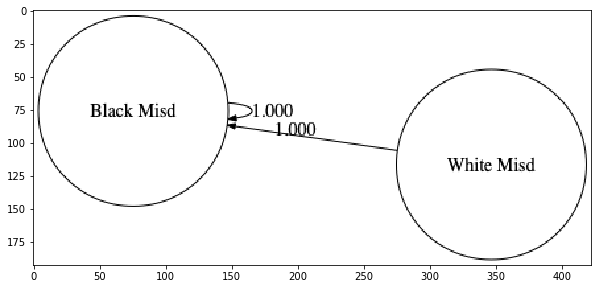

In [10]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["juv_misd_count"]] > 0 and x[f["African-American"]] == 1, "Black Misd")
g.add_group(lambda x: x[f["juv_misd_count"]] > 0 and x[f["Caucasian"]] == 1, "White Misd")
g.show_graph(grouped=True)

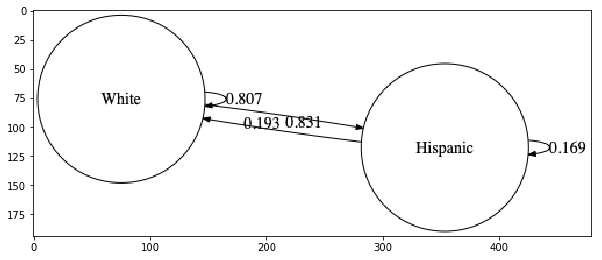

In [11]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["Caucasian"]] == 1, "White")
g.add_group(lambda x: x[f["Hispanic"]] == 1, "Hispanic")
g.show_graph(grouped=True)

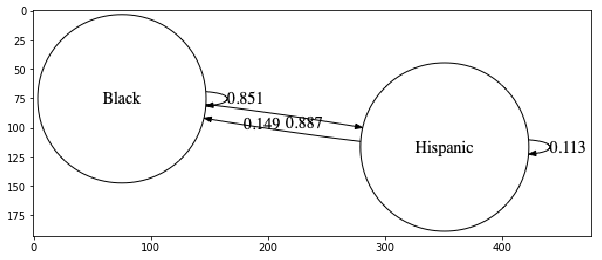

In [12]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["African-American"]] == 1, "Black")
g.add_group(lambda x: x[f["Hispanic"]] == 1, "Hispanic")
g.show_graph(grouped=True)

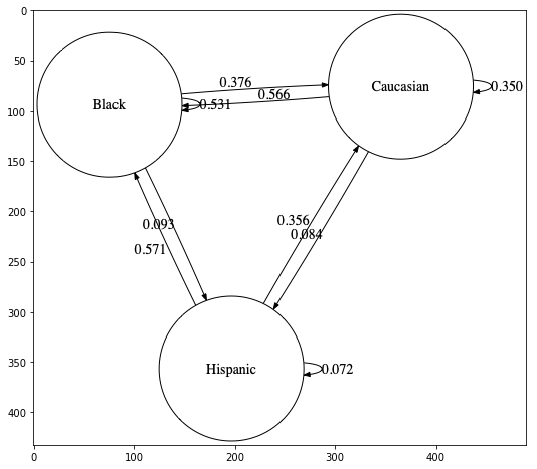

In [13]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["African-American"]] == 1, "Black")
g.add_group(lambda x: x[f["Caucasian"]] == 1, "Caucasian")
g.add_group(lambda x: x[f["Hispanic"]] == 1, "Hispanic")
g.show_graph(grouped=True)

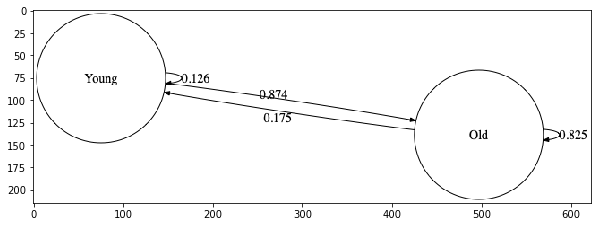

In [14]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["age"]] <= 23, "Young")
g.add_group(lambda x: x[f["age"]] > 23, "Old")
g.show_graph(grouped=True)

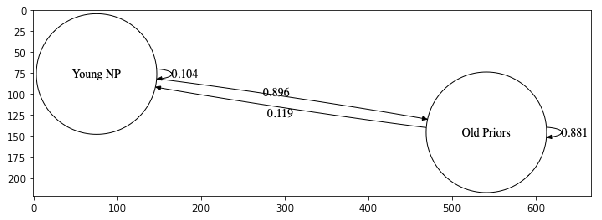

In [15]:
g = Map(transport_map=T, X1=X_a, symmetric=True)
g.add_group(lambda x: x[f["age"]] <= 23 and x[f['priors_count']] == 0, "Young NP")
g.add_group(lambda x: x[f["age"]] > 23 and x[f['priors_count']] > 0, "Old Priors")
g.show_graph(grouped=True)